In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Load dataset
df = pd.read_csv("index.csv")

# Quick overview
print(df.shape)
print(df.info())
df.head()

(1133, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1133 entries, 0 to 1132
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         1133 non-null   object 
 1   datetime     1133 non-null   object 
 2   cash_type    1133 non-null   object 
 3   card         1044 non-null   object 
 4   money        1133 non-null   float64
 5   coffee_name  1133 non-null   object 
dtypes: float64(1), object(5)
memory usage: 53.2+ KB
None


,date,datetime,cash_type,card,money,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte


In [2]:
# Handle missing values
df['card'] = df['card'].fillna("CASH")   # nulls mean cash users

# Convert dates
df['date'] = pd.to_datetime(df['date'])
df['datetime'] = pd.to_datetime(df['datetime'])

# Feature engineering
df['month'] = df['date'].dt.to_period('M').astype(str)
df['weekday'] = df['date'].dt.day_name()
df['hour'] = df['datetime'].dt.hour


In [3]:
df.isnull().sum()

date           0
datetime       0
cash_type      0
card           0
money          0
coffee_name    0
month          0
weekday        0
hour           0
dtype: int64

In [4]:
df.describe(include='all').T

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
date,1133,NaN,NaN,NaN,2024-05-19 11:36:29.232127232,2024-03-01 00:00:00,2024-04-14 00:00:00,2024-05-23 00:00:00,2024-06-22 00:00:00,2024-07-31 00:00:00,NaN
datetime,1133,NaN,NaN,NaN,2024-05-20 02:38:39.053382912,2024-03-01 10:15:50.520000,2024-04-14 10:55:27.406000128,2024-05-23 12:22:06.604999936,2024-06-22 08:39:50.272999936,2024-07-31 21:55:16.570000,NaN
cash_type,1133,2,card,1044,NaN,NaN,NaN,NaN,NaN,NaN,NaN
card,1133,447,CASH,89,NaN,NaN,NaN,NaN,NaN,NaN,NaN
money,1133.0,NaN,NaN,NaN,33.105808,18.12,28.9,32.82,37.72,40.0,5.035366
coffee_name,1133,8,Americano with Milk,268,NaN,NaN,NaN,NaN,NaN,NaN,NaN
month,1133,5,2024-05,267,NaN,NaN,NaN,NaN,NaN,NaN,NaN
weekday,1133,7,Tuesday,185,NaN,NaN,NaN,NaN,NaN,NaN,NaN
hour,1133.0,NaN,NaN,NaN,14.552515,7.0,11.0,14.0,18.0,22.0,4.084588


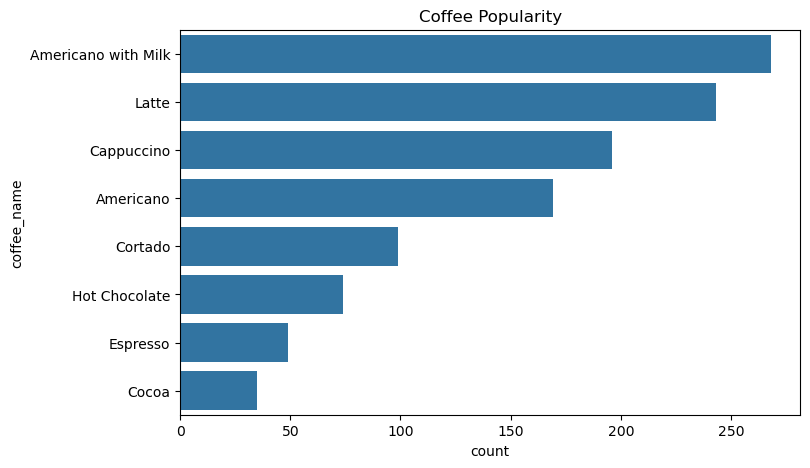

In [5]:
plt.figure(figsize=(8,5))
sns.countplot(y='coffee_name', data=df, order=df['coffee_name'].value_counts().index)
plt.title("Coffee Popularity")
plt.show()

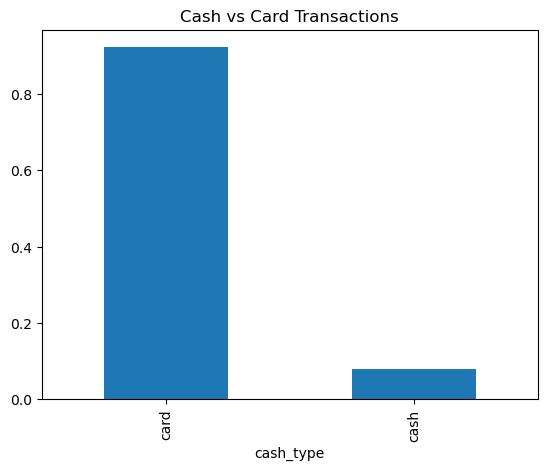

In [6]:
df['cash_type'].value_counts(normalize=True).plot(kind='bar')
plt.title("Cash vs Card Transactions")
plt.show()

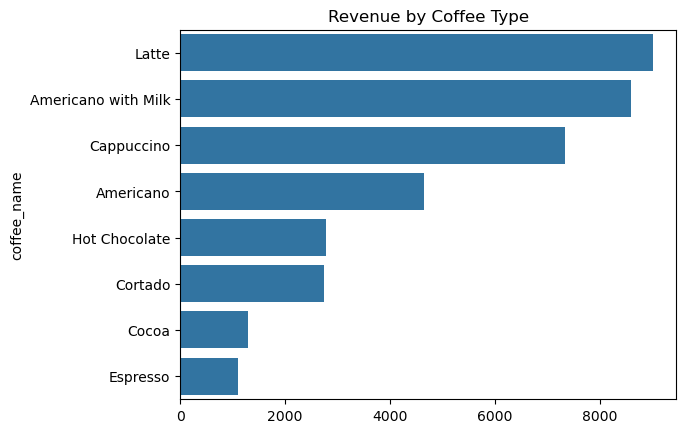

In [7]:
revenue = df.groupby('coffee_name')['money'].sum().sort_values(ascending=False)
sns.barplot(x=revenue.values, y=revenue.index)
plt.title("Revenue by Coffee Type")
plt.show()

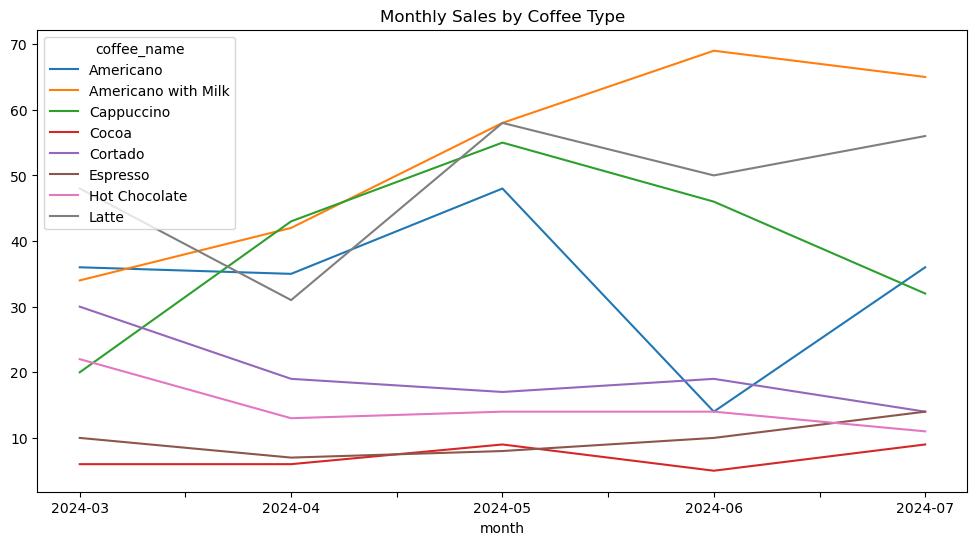

In [8]:
monthly = df.groupby(['month','coffee_name']).size().unstack().fillna(0)
monthly.plot(kind='line', figsize=(12,6))
plt.title("Monthly Sales by Coffee Type")
plt.show()

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Encode categorical variables
X = pd.get_dummies(df[['coffee_name','cash_type','month','weekday','hour']], drop_first=True)
y = df['money']

# Split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

# Train
model = LinearRegression()
model.fit(X_train,y_train)

# Evaluate
y_pred = model.predict(X_test)
print("MSE:", mean_squared_error(y_test,y_pred))
print("R²:", r2_score(y_test,y_pred))

MSE: 0.8320467206485149
R²: 0.9553058867683956
